# Init

## Download Kaggle + setting up api file

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! mv kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
mv: cannot stat 'kaggle.json': No such file or directory


## Download & unzip dataset

In [ ]:
! kaggle datasets download -d brendan45774/test-file
! unzip test-file.zip

test-file.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  test-file.zip
replace tested.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: tested.csv              


# Dataset

## Read dataset

In [ ]:
import pandas as pd

dataset = pd.read_csv("tested.csv")
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Fix dataset columns

In [ ]:
dataset.drop(['PassengerId', 'Pclass', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1, inplace=True)

dataset.columns

Index(['Survived', 'Sex', 'Age'], dtype='object')

## Clear missing

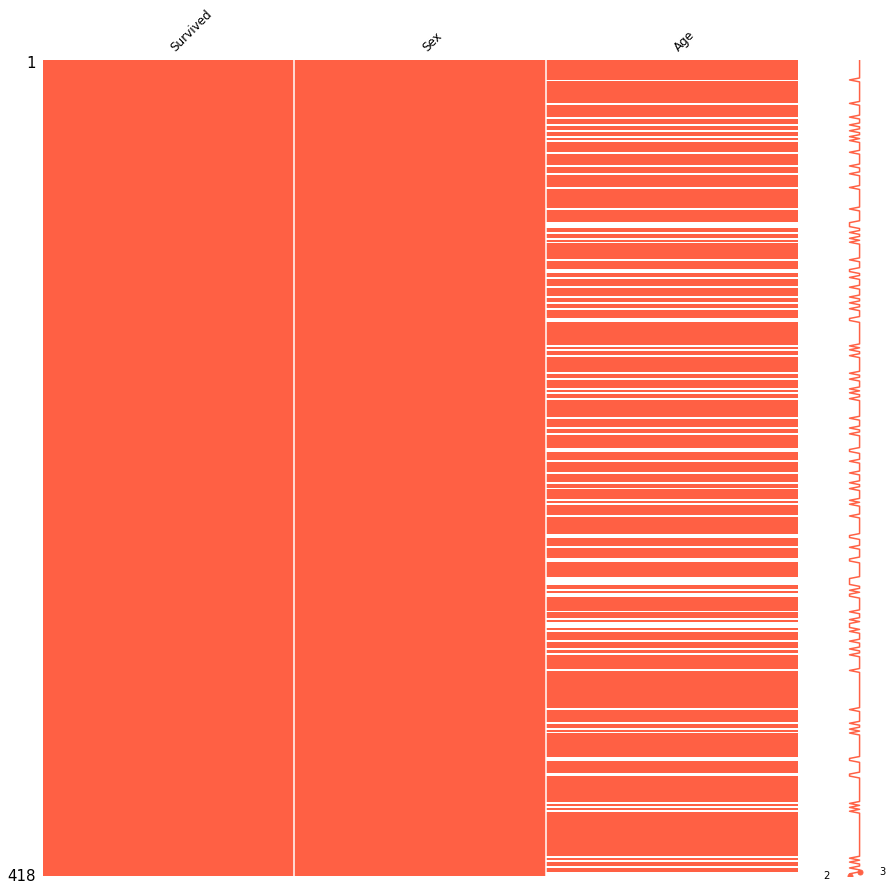

In [ ]:
import missingno

missingno.matrix(dataset, figsize=(15,15), fontsize=12, color=(1, 0.38, 0.27));
dataset = dataset.dropna(subset=['Survived', 'Sex', 'Age'])

# Models & Learning

### Creating train & test values

In [ ]:
from sklearn.model_selection import train_test_split

X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values


### Mapping

In [ ]:
import numpy as np

np.place(X,X=="female",[0])
np.place(X,X=="male",[1])

### Traint & test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

### Train data plot:

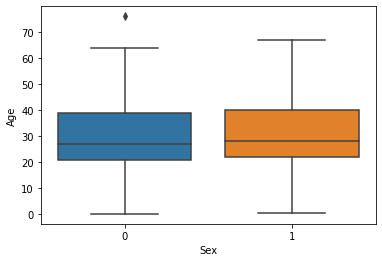

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

xtrain_df = pd.DataFrame(X_train,columns=['Sex','Age'])

sns.boxplot( x=xtrain_df["Sex"], y=xtrain_df["Age"] )

### Scaling 

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## K-Neighbours model

### Fit model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_neighbours = KNeighborsClassifier()
model_neighbours.fit(X_train, y_train)

KNeighborsClassifier()

### Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        14

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



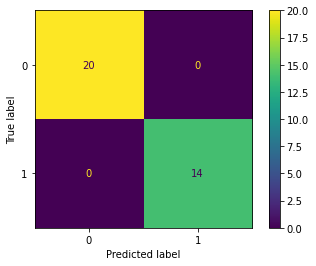

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = model_neighbours.predict(X_test)
confm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=confm,display_labels=model_neighbours.classes_).plot()
print(classification_report(y_test, y_pred))

### Custom prediction


In [ ]:
X_custom = scaler.transform([[0,72]])


model_neighbours.predict(X_custom)

array([1])

## Trees

### Fit model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_trees = DecisionTreeClassifier()
model_trees.fit(X_train, y_train)

DecisionTreeClassifier()

### Tree plot

[Text(0.5, 0.75, 'X[0] <= -0.249\ngini = 0.471\nsamples = 298\nvalue = [185, 113]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 113\nvalue = [0, 113]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 185\nvalue = [185, 0]')]

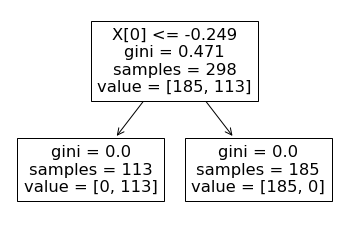

In [ ]:
from sklearn import tree

tree.plot_tree(model_trees)

### Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        14

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



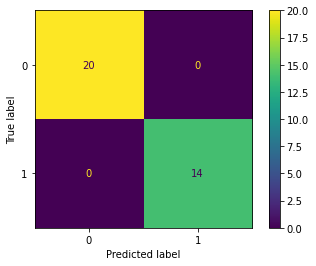

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model_trees.predict(X_test)
confm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=confm,display_labels=model_trees.classes_).plot()

print(classification_report(y_test, y_pred))

### Custom prediction


In [ ]:
X_custom = scaler.transform([[0,72]])

model_trees.predict(X_custom)

array([1])

## SVC

### Fit model

In [ ]:
from sklearn.svm import SVC

model_svc = SVC()
model_svc.fit(X_train, y_train)

SVC()

### Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        14

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



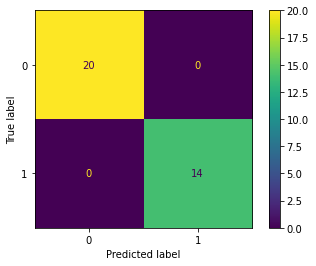

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model_svc.predict(X_test)
confm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=confm,display_labels=model_svc.classes_).plot()

print(classification_report(y_test, y_pred))

### Custom prediction


In [ ]:
X_custom = scaler.transform([[0,72]])

model_svc.predict(X_custom)

array([1])

## Logistic Regression

### Fit model

In [ ]:
from sklearn.linear_model import LogisticRegression

model_regr = LogisticRegression()
model_regr.fit(X_train, y_train)

LogisticRegression()

### Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        14

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



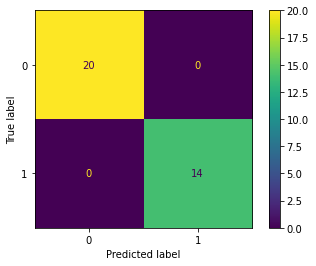

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model_regr.predict(X_test)
confm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=confm,display_labels=model_regr.classes_).plot()

print(classification_report(y_test, y_pred))

### Report

In [ ]:
X_custom = scaler.transform([[0,72]])

model_regr.predict(X_custom)

array([1])